# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [2]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [3]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  """A simple linear regression model."""
  y = phi0 + (phi1 * x)

  return y

In [4]:
# sense check; given these paramaters then y should equal x
assert np.array_equal(f(x=x, phi0=0, phi1=1), x), "The arrays are not equal"

In [5]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

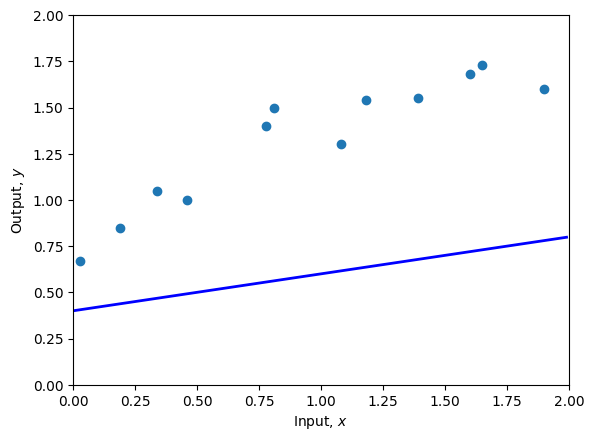

In [6]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [7]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):
  """Calculate the loss equation 2.5"""
  loss = np.mean((phi0 + (phi1 * x) - y)**2)
  return loss

In [8]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 0.59, Ground truth =7.07


You'll notice the "Ground truth" in the code chunk above. Where does it come from and what is "Ground truth". It's not mentioned elsewhere in the book so I've added my thoughts here.


"Ground truth" is a term used in machine learning and data science to refer to the true, observed values or labels against which the predictions or outputs of a model are compared. It serves as the reference point or standard for evaluating the performance of the model.

In the context of your code, "Ground truth" is the actual value that you expect the loss to be or a benchmark value you are comparing your computed loss against. It is used to assess how close the computed loss is to this known or expected value.

Here’s a more detailed breakdown:

Ground truth values are the actual values from your dataset. For example, if you are trying to predict housing prices, the ground truth would be the actual prices of the houses.
Predicted values are the values produced by your model. In this case, it would be the prices predicted by your machine learning model.
The loss (or error) measures the difference between the ground truth values and the predicted values. A common loss function in regression problems is the Mean Squared Error (MSE), which calculates the average squared difference between the actual and predicted values.

In your code example, the phrase Ground truth = 7.07 appears to be a known benchmark or expected value for the loss, against which you are comparing your computed loss. This helps in evaluating whether your model is performing as expected.

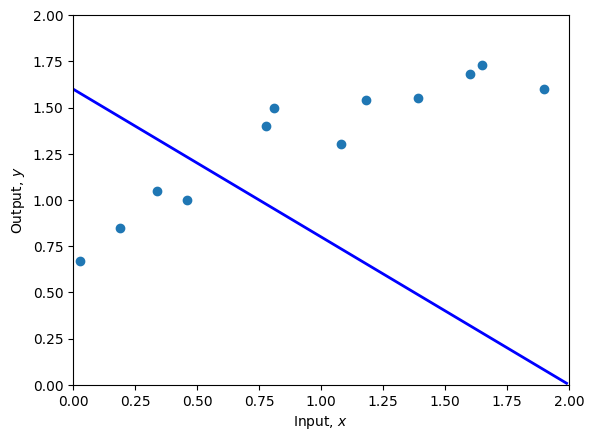

Your Loss = 0.86, Ground truth =10.28


In [9]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

We can approach this task by creating an intelligent "guesstimate" for `phi0` and `phi1` by remembering that `phi0` is the y-intercept / constant and `phi1` is the gradient. Looking at the data and imagining where a line of best fit would go is a useful start.

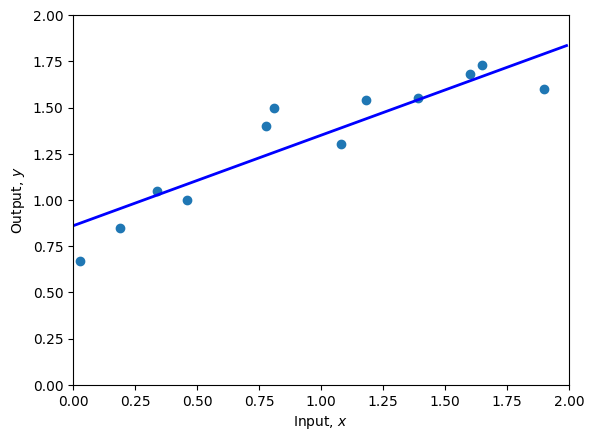

Your Loss = 0.02


In [10]:
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Starting values: I started by drawing an imaginary "line of best fit".
# From this I looked where the line crossed the y-axis for phi0 (0.75)
# and estimated how much y increased for every 1 unit of x (0.50)
phi0 = 0.86 ; phi1 =0.49

plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

## Being fancy with code through Gradient Descent for Linear Regression

### Introduction

Manually tweaking the above phi0 and phi1 is a useful exercise for giving us the intuition behind what values work well. Prior to engaging with that approach, it got me thinking about how to automate the search. We just need to repeat and adjust the parameters based on whether the loss increases or decreases. From the UDL book we can see what the loss function is in equation 2.5.

We are implementing gradient descent to fit a linear regression model. The goal is to find the optimal parameters $\phi_0$ and $\phi_1$ that minimize the loss function.

### Loss Function

The loss function we are using is the Mean Squared Error (MSE):

$$
L = \frac{1}{n} \sum_{i=1}^{n} (\phi_0 + \phi_1 x_i - y_i)^2
$$

### Gradient Descent Derivatives

To update our parameters using gradient descent, we need the partial derivatives of the loss function with respect to $\phi_0$ and $\phi_1$:

$$
\frac{\partial L}{\partial \phi_0} = \frac{2}{n} \sum_{i=1}^{n} (\phi_0 + \phi_1 x_i - y_i)
$$

$$
\frac{\partial L}{\partial \phi_1} = \frac{2}{n} \sum_{i=1}^{n} (\phi_0 + \phi_1 x_i - y_i) x_i
$$

### Implementation

We will now implement this in Python and use gradient descent to find the optimal parameters.



In [11]:
import numpy as np

# Define the compute_loss function
def compute_loss(x, y, phi0, phi1):
    return np.mean((phi0 + (phi1 * x) - y) ** 2)

# Calculate gradients
def compute_gradients(x, y, phi0, phi1):
    n = len(y)
    y_pred = phi0 + phi1 * x
    error = y_pred - y
    d_phi0 = (2 / n) * np.sum(error)
    d_phi1 = (2 / n) * np.sum(error * x)
    return d_phi0, d_phi1

# Gradient descent function
def gradient_descent(x, y, phi0, phi1, learning_rate, iterations):
    for _ in range(iterations):
        d_phi0, d_phi1 = compute_gradients(x, y, phi0, phi1)
        phi0 -= learning_rate * d_phi0
        phi1 -= learning_rate * d_phi1
    return phi0, phi1

# x and y are already defined
phi0 = 1.60
phi1 = -0.8

# Parameters for gradient descent
learning_rate = 0.01
iterations = 1000

# Perform gradient descent
phi0, phi1 = gradient_descent(x, y, phi0, phi1, learning_rate, iterations)

# Print the results
print(f'Optimized phi0: {phi0}')
print(f'Optimized phi1: {phi1}')
print(f'Your Loss = {compute_loss(x, y, phi0, phi1):3.2f}')


Optimized phi0: 0.8649182460978444
Optimized phi1: 0.4880634388627798
Your Loss = 0.02


# Explanation of the gradient descent update steps above

1. Gradient Calculation:

* `d_phi0` and `d_phi1` are the gradients (partial derivatives) of the loss function with respect to `phi0` and `phi1`, respectively. These gradients indicate the direction and rate of change of the loss function.

2. Learning Rate:

* `learning_rate` is a hyperparameter that controls the size of the steps we take to reach the minimum of the loss function. It's a small positive value, often set through experimentation.

3. Parameter Update:

* `phi0 -= learning_rate * d_phi0:` This line updates `phi0` by subtracting the product of the learning rate and the gradient `d_phi0`. Essentially, it moves `phi0` in the direction that decreases the loss.
* `phi1 -= learning_rate * d_phi1:` Similarly, this line updates phi1 by subtracting the product of the learning rate and the gradient `d_phi1`. It moves `phi1` in the direction that decreases the loss.

## How It Works
Gradient Descent Step:
* For each iteration of gradient descent, you calculate how much the parameters `phi0` and `phi1` need to change to reduce the loss. This is done by computing the gradients.
* Then, you adjust the parameters by moving them in the opposite direction of the gradients. The size of the adjustment is controlled by the learning rate.

# Visualizing the loss function

The above process is equivalent to to descending coordinate wise on the loss function<br>

Now let's plot that function

In [12]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])


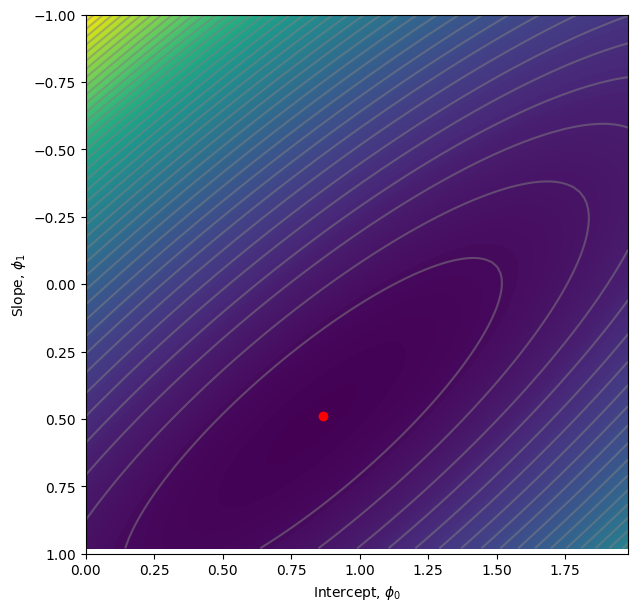

In [13]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()